In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

## Preprocess Data

In [13]:
loan_df = pd.read_csv('./loan_timing.csv')
display(loan_df.head())
display(loan_df.describe())

,days since origination,days from origination to chargeoff
0,109,NaN
1,679,NaN
2,723,NaN
3,509,NaN
4,254,NaN


,days since origination,days from origination to chargeoff
count,50000.000000,3305.000000
mean,365.844760,214.852345
std,210.965114,165.233874
min,0.000000,0.000000
25%,183.000000,76.000000
50%,366.000000,180.000000
75%,549.000000,323.000000
max,730.000000,725.000000


In [14]:
# 3 years
days_to_repaid = 3 * 365
print("Data Vaildation : charge off after 3 years count", 
      len(loan_df[loan_df['days from origination to chargeoff'] > days_to_repaid]))
print("Data Vaildation : loans age greater than 3 years count", 
      len(loan_df[loan_df['days since origination'] > days_to_repaid]))

Data Vaildation : charge off after 3 years count 0
Data Vaildation : loans age greater than 3 years count 0


## charged off loans

In [15]:
charged_off_df = loan_df[~loan_df['days from origination to chargeoff'].isna()]
display(charged_off_df.head())

,days since origination,days from origination to chargeoff
14,327,78.0
15,400,390.0
16,721,362.0
26,410,48.0
61,649,412.0


## paid loans

In [16]:
paid_df = loan_df[loan_df['days from origination to chargeoff'].isna()]
display(paid_df.head())

,days since origination,days from origination to chargeoff
0,109,NaN
1,679,NaN
2,723,NaN
3,509,NaN
4,254,NaN


<IPython.core.display.Javascript object>


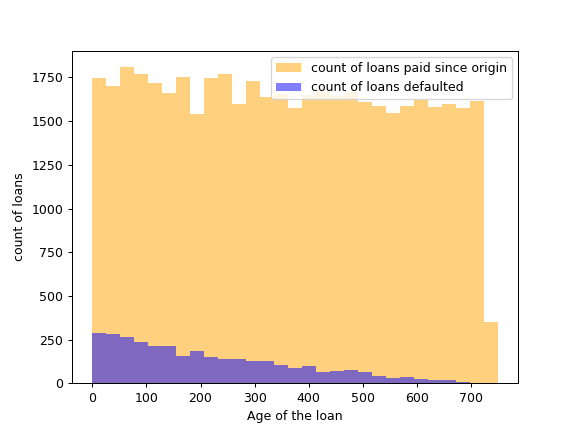

In [17]:
% matplotlib notebook
# charged_off_df.hist('days from origination to chargeoff', bins=30)
# paid_df.hist('days since origin', bin=30)
bins = np.linspace(0, 750, 30)
# bins=30
plt.hist(paid_df['days since origination'], bins, alpha=0.5, 
         label='count of loans paid since origin', color='orange')
plt.hist(charged_off_df['days from origination to chargeoff'], bins, alpha=0.5, 
         label='count of loans defaulted', color='blue')
plt.legend(loc='upper right')
plt.ylabel('count of loans')
plt.xlabel('Age of the loan')
plt.show()

According to the above graph their is an gradual decrease in the customers who default as time from the origin increases. In other words we can see a lot of defaulters at the early ages after the loan is approved.

<IPython.core.display.Javascript object>


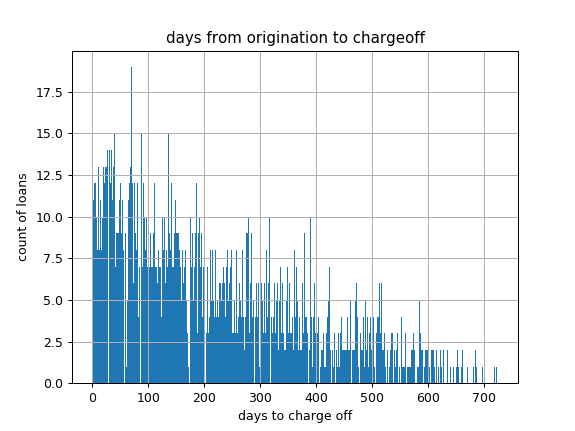

In [19]:
charged_off_df.hist('days from origination to chargeoff', bins=750)
plt.legend(loc='upper right')
plt.ylabel('count of loans')
plt.xlabel('days to charge off')
plt.show()

<IPython.core.display.Javascript object>


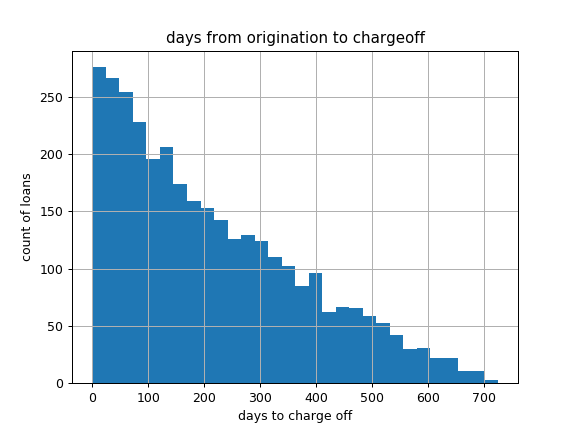

In [20]:
charged_off_df.hist('days from origination to chargeoff', bins=30)
plt.legend(loc='upper right')
plt.ylabel('count of loans')
plt.xlabel('days to charge off')
plt.show()

The decrease seems to be exponential with some seasonality. But I am going to ignore the seasonality in the model

## Convert the data into list of lists

In [8]:
x, y = [], []
for i in range(0, 700, 12):
    x.append(i)
    y.append(len(charged_off_df[charged_off_df['days from origination to chargeoff'] < i]))

print(x,y)
plt.plot(x, y)
plt.show()

[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 192, 204, 216, 228, 240, 252, 264, 276, 288, 300, 312, 324, 336, 348, 360, 372, 384, 396, 408, 420, 432, 444, 456, 468, 480, 492, 504, 516, 528, 540, 552, 564, 576, 588, 600, 612, 624, 636, 648, 660, 672, 684, 696] [0, 133, 263, 401, 532, 650, 784, 903, 1011, 1114, 1213, 1313, 1419, 1508, 1590, 1651, 1742, 1832, 1902, 1968, 2039, 2106, 2169, 2227, 2301, 2353, 2417, 2479, 2530, 2581, 2629, 2679, 2722, 2771, 2817, 2848, 2879, 2912, 2938, 2977, 3014, 3047, 3078, 3105, 3129, 3147, 3169, 3182, 3202, 3216, 3232, 3245, 3254, 3265, 3272, 3283, 3291, 3296, 3300]


In [9]:
pd.cut(paid_df['days since origination'], bins=28).value_counts()

(52.143, 78.214]      1826
(-0.73, 26.071]       1800
(78.214, 104.286]     1761
(234.643, 260.714]    1758
(338.929, 365.0]      1743
(156.429, 182.5]      1742
(208.571, 234.643]    1739
(286.786, 312.857]    1722
(26.071, 52.143]      1706
(104.286, 130.357]    1700
(417.143, 443.214]    1681
(130.357, 156.429]    1679
(703.929, 730.0]      1662
(443.214, 469.286]    1656
(469.286, 495.357]    1652
(547.5, 573.571]      1644
(365.0, 391.071]      1635
(312.857, 338.929]    1635
(182.5, 208.571]      1620
(573.571, 599.643]    1618
(391.071, 417.143]    1616
(260.714, 286.786]    1609
(677.857, 703.929]    1594
(495.357, 521.429]    1592
(599.643, 625.714]    1589
(521.429, 547.5]      1578
(625.714, 651.786]    1570
(651.786, 677.857]    1568
Name: days since origination, dtype: int64

In [10]:
pd.cut(charged_off_df['days from origination to chargeoff'], bins=40).value_counts()

(-0.725, 18.125]     210
(18.125, 36.25]      202
(36.25, 54.375]      193
(54.375, 72.5]       191
(72.5, 90.625]       166
(126.875, 145.0]     164
(90.625, 108.75]     159
(108.75, 126.875]    148
(181.25, 199.375]    137
(145.0, 163.125]     132
(199.375, 217.5]     111
(271.875, 290.0]     111
(217.5, 235.625]     105
(235.625, 253.75]    100
(163.125, 181.25]     99
(308.125, 326.25]     94
(253.75, 271.875]     89
(290.0, 308.125]      82
(344.375, 362.5]      78
(326.25, 344.375]     74
(380.625, 398.75]     72
(362.5, 380.625]      68
(471.25, 489.375]     57
(398.75, 416.875]     53
(416.875, 435.0]      53
(453.125, 471.25]     52
(507.5, 525.625]      44
(435.0, 453.125]      42
(489.375, 507.5]      38
(525.625, 543.75]     31
(543.75, 561.875]     25
(561.875, 580.0]      25
(580.0, 598.125]      25
(598.125, 616.25]     19
(634.375, 652.5]      17
(616.25, 634.375]     14
(652.5, 670.625]      11
(670.625, 688.75]      8
(688.75, 706.875]      3
(706.875, 725.0]       3
